In [1]:
%pylab
%matplotlib inline

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [2]:
import gocell

In [3]:
pipeline = gocell.pipeline.create_default_pipeline(2)

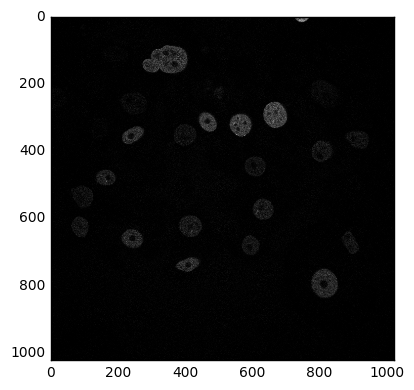

In [4]:
g_raw = gocell.io.imread('~/Dokumente/data/isbi2013/N2DH-GOWT1/02/t%02d.tif' % 0)
imshow(g_raw, 'gray')
tight_layout()

In [5]:
data, cfg = pipeline.process_image(g_raw, cfg={
        'preprocess': {
            'remove_dark_spots': True
        },
        'seeds': {
            'max_count': 100,
            'exclude_border': False
        },
        'superpixels_entropy': {
            'sigma': 9.
        },
        'compute_candidates': {
            'max_superpixel_distance': 85,
            'max_superpixel_depth': 2
        },
        'max_setpack_weights': {
            'beta': 1
        },
        'postprocess': {
            'energy_threshold': {
                'gauss_tolerance': 1
            }
        }
    });

Removed 42 dark spots
Superpixels: 100
Discarded 50 superpixels, 50 remaining
Computed superpixel adjacencies
Candidates: 113
Unique candidates: 89
Processed candidates: 89
Analyzed 89 candidates
Computed MAXSETPACK weights
Greedy MAXSETPACK - Accepted candidates: 37
Minimum accuracy of MAXSETPACK solution: 88.73 %


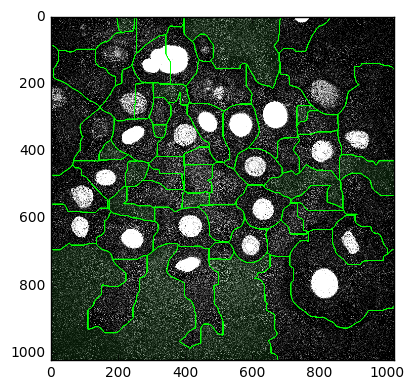

In [6]:
imshow(gocell.render.render_superpixels(data, border_radius=2))
tight_layout()

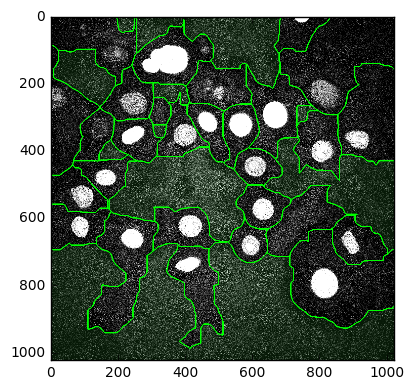

In [7]:
imshow(gocell.render.render_activity_regions(data))
tight_layout()

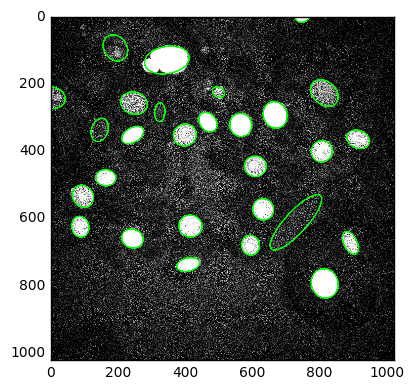

In [8]:
imshow(gocell.render.render_model_shapes_over_image(data))
tight_layout()